# Chapter 3

### Our first TensorFlow graph

In [2]:
import tensorflow as tf 
a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 
sess = tf.Session()    #  _
outs = sess.run(f)     #   |_ Create, run and close the session to compute the graph
sess.close()           #  _|
print("outs = {}".format(outs))

outs = 5


In [3]:
# Graph A
# 1. Construct the graph
a = tf.constant(5) 
b = tf.constant(2)
c = tf.multiply(a,b)
d = tf.add(a,b) 
e = tf.subtract(c,d) 
f = tf.add(c,d)
g = tf.divide(e,f)

#2. Execute the graph
sess = tf.Session()    
outs = sess.run(g)     
sess.close()    

print("outs = {}".format(outs))

outs = 0.17647058823529413


In [4]:
# Graph B
# 1. Construct the graph
a = tf.constant(5.0)   # use 5.0 and not 5 to create a Tensor float32
b = tf.constant(2.0)   # Idem
c = tf.multiply(a,b)
d = tf.sin(c)          # sin doesn't work with int32
e = tf.divide(b,d)

# 2. Execute the graph
sess = tf.Session()
outs = sess.run(e)
sess.close()

print("outs = {}".format(outs))

outs = -3.676327705383301


### Constructing and managing our graph 

In [5]:
import tensorflow as tf
print(tf.get_default_graph())

g = tf.Graph() # Create another graph
print(g)

In [6]:
a = tf.constant(5) 

print(a.graph is g) # g is not the default graph so a is automatically included in the other
print(a.graph is tf.get_default_graph())

False
True


In [7]:
g1 = tf.get_default_graph() 
g2 = tf.Graph() 

print(g1 is tf.get_default_graph())

with g2.as_default(): 
    print(g1 is tf.get_default_graph())

print(g1 is tf.get_default_graph())

True
False
True


### Fetches 

In [8]:
with tf.Session() as sess:
   fetches = [a,b,c,d,e,f]
   outs = sess.run(fetches) 

print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2.0, 10.0, -0.54402113, -3.6763277, 17]
<class 'numpy.int32'>


### Nodes are operations, edges are Tensor objects  

In [9]:
c = tf.constant(4.0)
print(c)

Tensor("Const_8:0", shape=(), dtype=float32)


### Data types  

In [10]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_9:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [11]:
x = tf.constant([1,2,3],name='x',dtype=tf.float32) 
print(x.dtype)
x = tf.cast(x,tf.int64)
print(x.dtype)

<dtype: 'float32'>
<dtype: 'int64'>


### Tensor arrays and Shapes  

In [12]:
import numpy as np 

c = tf.constant([[1,2,3],
                 [4,5,6]]) 
print("Python List input: {}".format(c.get_shape()))

c = tf.constant(np.array([
                 [[1,2,3], 
                  [4,5,6]], 

                 [[1,1,1], 
                  [2,2,2]]
                 ])) 

print("3d Numpy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
3d Numpy array input: (2, 2, 3)


(1, 50000)


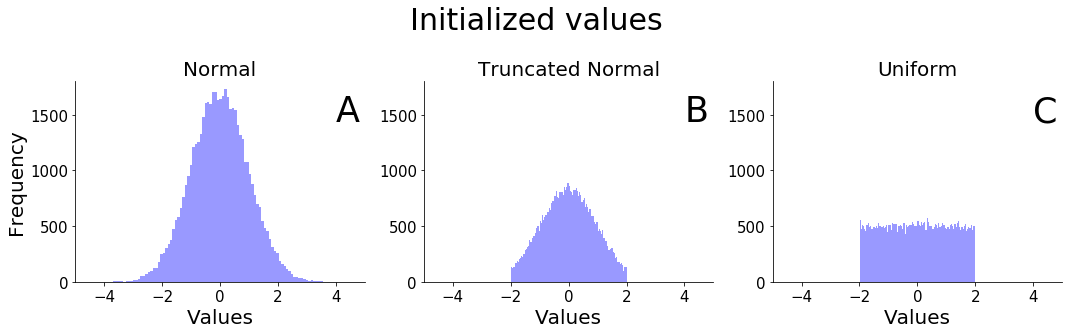

In [13]:
import matplotlib.pyplot as plt 
% matplotlib inline

sess = tf.InteractiveSession()

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.random_normal((1,50000),mean,std).eval()
x_truncated = tf.truncated_normal((1,50000),mean,std).eval()

# === Uniform distribution
minval = -2 
maxval = 2
x_uniform = tf.random_uniform((1,50000),minval,maxval).eval()

sess.close()


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#     ax.set_ylim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,1800])
    
    simpleaxis(ax)
    
    
axarr[0].set_ylabel('Frequency',fontsize=20)
plt.suptitle('Initialized values',fontsize=30, y=1.15)


for ax,letter in zip(axarr,['A','B','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)

plt.tight_layout()

plt.savefig('histograms.png', bbox_inches='tight', format='png', dpi=200, pad_inches=0,transparent=True)

plt.show()

In [14]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5) 
print("The content of 'c':\n {}\n".format(c.eval()))
sess.close()

The content of 'c':
 [ 0.  1.  2.  3.  4.]



### Matrix multiplication

In [15]:
A = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(a.get_shape())

x = tf.constant([1,0,1])
print(x.get_shape())

x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A,x)

sess = tf.InteractiveSession()
print('matmul result:\n {}'.format(b.eval()))
sess.close()

()
(3,)
(3, 1)
matmul result:
 [[ 4]
 [10]]


### Names  

In [16]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    c2 = tf.constant(4,dtype=tf.int32,name='c') 
print(c1.name)
print(c2.name)

c:0
c_1:0


### Name scopes

In [17]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


### Variables


In [18]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[ 0.25519454  0.35806507  0.01500918  0.44005394 -2.00021839]]


### New variables are created each time

In [19]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_1:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[-0.24290414  0.11199079 -0.62843394 -0.15059957  0.86138743]]


### Placeholders

In [20]:
x_data = np.random.randn(5,10) 
w_data = np.random.randn(10,1) 

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32,shape=(5,10))
    w = tf.placeholder(tf.float32,shape=(10,1))
    b = tf.fill((5,1),-1.) 
    xw = tf.matmul(x,w)

    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s,feed_dict={x: x_data,w: w_data}) 

print("outs = {}".format(outs))

outs = 6.568281650543213


### Example 1: Linear Regression

In [21]:
# === Create data and simulate results =====
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

noise = np.random.randn(1,2000)*0.1
y_data = np.matmul(w_real,x_data.T) + b_real + noise

In [24]:
NUM_STEPS = 10

g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)

    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b])) 
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

0 [array([[ 0.28092083,  0.49938983,  0.09246023]], dtype=float32), -0.20603922]
5 [array([[ 0.30085859,  0.50414336,  0.10045463]], dtype=float32), -0.20259725]
10 [array([[ 0.30085859,  0.50414336,  0.10045464]], dtype=float32), -0.20259725]


### Example 2: Logistic Regression


In [25]:
N = 20000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# === Create data and simulate results =====
x_data = np.random.randn(N,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
wxb = np.matmul(w_real,x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1,y_data_pre_noise)

In [26]:
NUM_STEPS = 50


g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred) 
        loss = tf.reduce_mean(loss)
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)



    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

        print(50, sess.run([w,b]))

0 [array([[ 0.03537017,  0.0559756 ,  0.00762741]], dtype=float32), -0.021250073]
5 [array([[ 0.15638342,  0.24792582,  0.03353649]], dtype=float32), -0.094853863]
10 [array([[ 0.22079873,  0.35047996,  0.04719705]], dtype=float32), -0.13476737]
15 [array([[ 0.25656727,  0.40759641,  0.05474781]], dtype=float32), -0.15722525]
20 [array([[ 0.27699623,  0.44029838,  0.05905464]], dtype=float32), -0.17017516]
25 [array([[ 0.28886345,  0.45933482,  0.0615578 ]], dtype=float32), -0.17775252]
30 [array([[ 0.29582679,  0.47052532,  0.06302881]], dtype=float32), -0.18222432]
35 [array([[ 0.29993728,  0.47714174,  0.0638989 ]], dtype=float32), -0.1848765]
40 [array([[ 0.30237237,  0.48106712,  0.06441548]], dtype=float32), -0.18645398]
45 [array([[ 0.30381811,  0.48340073,  0.06472285]], dtype=float32), -0.1873938]
50 [array([[ 0.30453944,  0.48456633,  0.06487651]], dtype=float32), -0.18786402]
